**Task:**  Find a data set which is suitable for classification (you can use one of the data sets which you used in Homework II) with numerical features only (if the data set involves categorical ones in addition to numerical ones, you can drop the categorical ones). Build a LogisticRegression classifier with penalty=None which requires scaling of numerical features with StandardScaler and dimension reduction of numerical features with PCA. Show us the workflow and report the accuracy of the resulting model on the unseen data.


## HALLOWEN CANDY CLASSIFICATION

---

## DATA DESCRIPTION

I will use the "The Ultimate Halloween Candy Power Ranking" dataset from kaggle (https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking) for this task. The dataset consist of the data collected via a website where participants were shown two fun-sized candies and asked to click on their preference. 
More than 269,000 votes were collected from 8,371 different IP addresses for this data.


**The dataset consist of following features**:

- **competitorname**: Name of competitor.

- **chocolate**: Does it contain chocolate?

- **fruity**: Is it fruit flavored?

- **caramel**: Is there caramel in the candy?

- **peanutalmondy**: Does it contain peanuts, peanut butter or almonds?

- **nougat**: Does it contain nougat?

- **crispedricewafer**: Does it contain crisped rice, wafers, or a cookie component?

- **hard**: Is it a hard candy?

- **bar**: Is it a candy bar?

- **pluribus**: Is it one of many candies in a bag or box?

- **sugarpercent**: The percentile of sugar it falls under within the data set.

- **pricepercent**: The unit price percentile compared to the rest of the set.

- **winpercent**: The overall win percentage according to 269,000 matchups.

## PREPARING THE DATA

---

In [1]:
#import the data set
import numpy as np
import pandas as pd

candy_df = pd.read_csv("datasets/candy-data.csv")
candy_df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [2]:
#checking the dimension

candy_df.shape

(85, 13)

In [3]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
#Checking if there any null values

candy_df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [5]:
#Checking if there any duplicated values

candy_df.duplicated().sum()

0

**There is no any null or duplicated value**

In [6]:
#splitting the data into test and train sets

from sklearn.model_selection import train_test_split

x=candy_df[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent']]
y=candy_df['winpercent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
#scalling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
candy_df = scaler.fit_transform(x)

In [8]:
#reducing the dimension

from sklearn.decomposition import PCA

pca = PCA()

pca.fit(candy_df)

PCA()

In [9]:
pca.components_.T

array([[ 0.41086622, -0.21740236,  0.07367612, -0.03080335, -0.08236125,
         0.12184878, -0.48511279, -0.02384081, -0.1465317 , -0.66558792,
         0.23566084],
       [-0.39589923,  0.26069583,  0.01334054,  0.06923952, -0.07628294,
        -0.35070344,  0.41272241,  0.02092286,  0.09592179, -0.67093829,
         0.1066803 ],
       [ 0.25228979,  0.39874749,  0.01962328,  0.03862553,  0.5264057 ,
         0.59218305,  0.26620561, -0.08889254,  0.1695292 , -0.18571962,
        -0.07543422],
       [ 0.24213953, -0.23192057, -0.20248013, -0.45441432, -0.44568311,
         0.26885853,  0.46430139,  0.36312121,  0.11721967, -0.06910818,
        -0.05677309],
       [ 0.25053583,  0.3320903 , -0.52893191, -0.14935275,  0.22275924,
        -0.35149766, -0.1771402 ,  0.33313353,  0.22040317,  0.10800392,
         0.3861364 ],
       [ 0.2287828 , -0.02336145,  0.51840794,  0.49204868, -0.02404426,
        -0.05104141,  0.15578026,  0.57870373,  0.07878386,  0.10911849,
         0.236

In [10]:
#calculating the variance of each PC
pca.explained_variance_

array([3.96539688, 1.28432938, 1.22626357, 1.15557017, 0.90480703,
       0.67480716, 0.5623566 , 0.48415631, 0.44494895, 0.23726273,
       0.19105359])

In [11]:
#calculating the variance ratio

pca.explained_variance_ratio_

array([0.35624956, 0.1153836 , 0.11016699, 0.10381593, 0.08128748,
       0.06062439, 0.05052188, 0.0434964 , 0.03997402, 0.02131558,
       0.01716417])

### Scree Plot

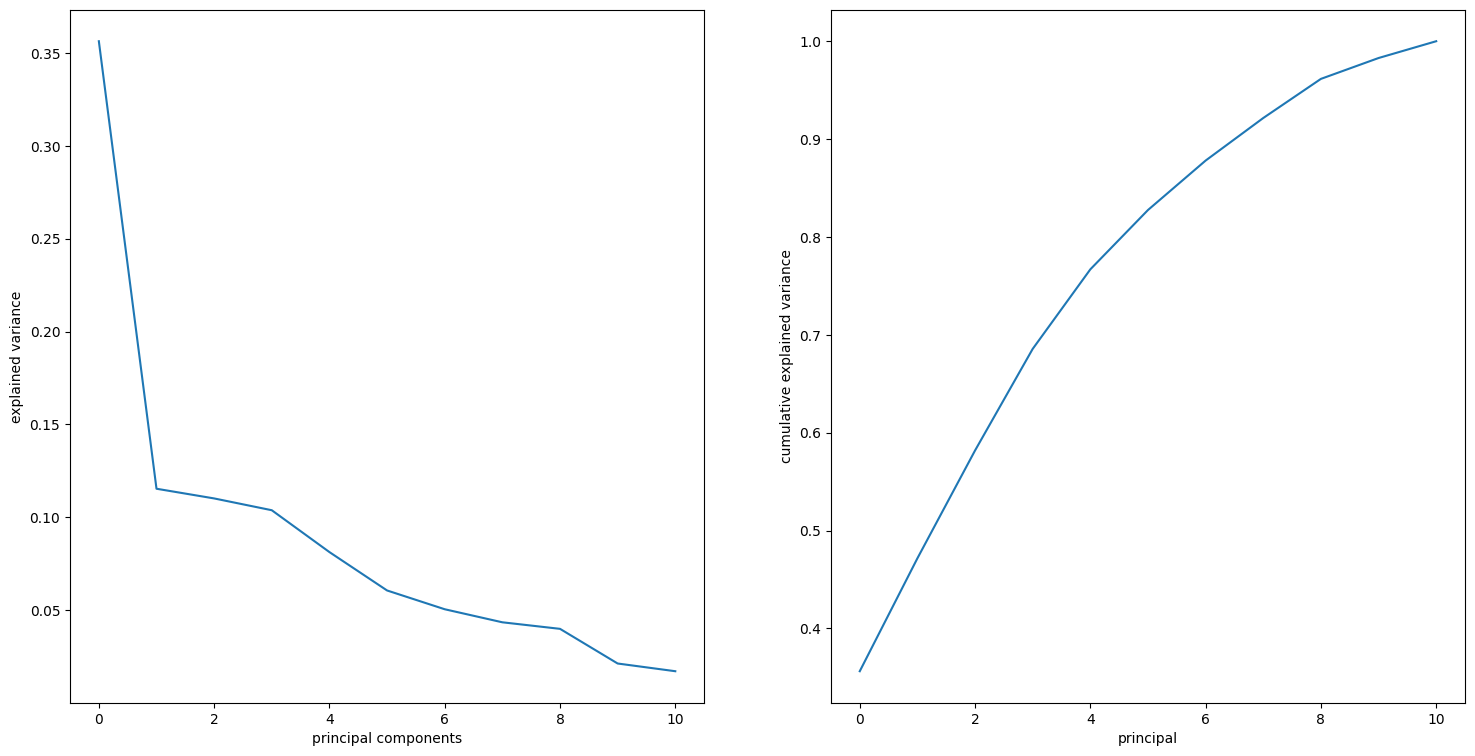

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,9))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal')
plt.ylabel('cumulative explained variance')

plt.show()

**When the graph is examined, it is seen that the number of components that capture a significant part of the number of principal components required to maintain the desired variance is 1.**

In [13]:
#instantiate the pca object
from sklearn.decomposition import PCA

#instantiate the pca class
pca = PCA(n_components=1)
pca.fit_transform(candy_df)[0:5]

array([[ 3.67600339],
       [ 2.60635232],
       [-0.81423018],
       [-0.33739039],
       [-0.80300643]])

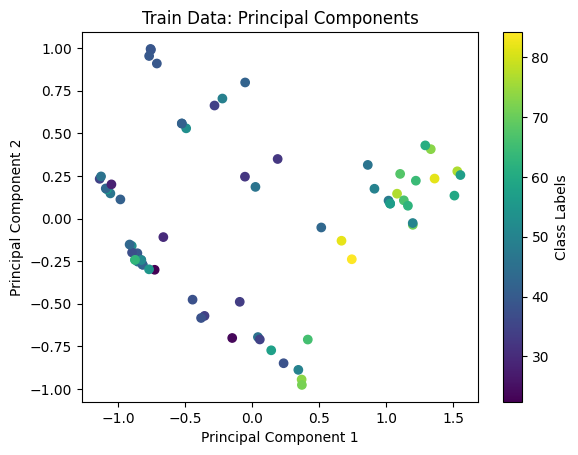

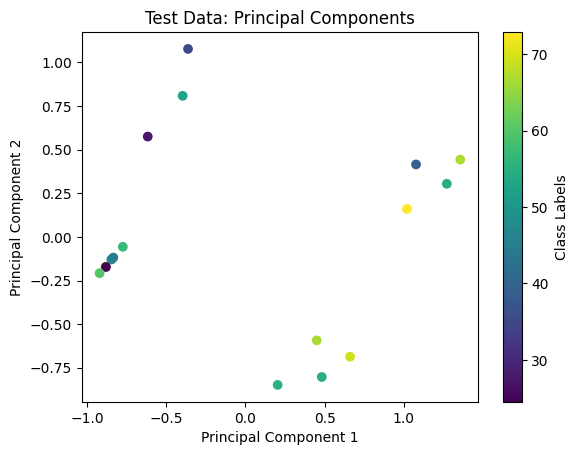

In [14]:
import matplotlib.pyplot as plt

pca_train = PCA(n_components=2)
pca_test = PCA(n_components=2)

train_pca = pca_train.fit_transform(x_train)
test_pca = pca_test.fit_transform(x_test)

plt.scatter(train_pca[:, 0], train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Train Data: Principal Components')
plt.colorbar(label='Class Labels')
plt.show()


plt.scatter(test_pca[:, 0], test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Data: Principal Components')
plt.colorbar(label='Class Labels')
plt.show()

**Class labels increasing with distance from the principal component 1 and principal component 2. I think test and train**

***I think logistic regression will result in a higher accuracy in train and test data***

## IMPLENTATION OF LOGISTIC REGRESSION CLASSIFIER

---

In [18]:
#Defining the logistic regression model

from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


logreg_model = LogisticRegression()
logreg_model.fit(X_train_pca , y_train)


y_train_pred = logreg_model.predict(X_train_pca)
y_test_pred = logreg_model.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

ValueError: Unknown label type: 'continuous'